# MASTER DATA SCIENCE: NUCLIO
# PROFESOR: CARME VIÑAS
# CLASE 1: EDA + Data Cleaning

### IMPORTAMOS LIBRERÍAS Y DATOS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerías necesarias.



In [3]:
import pandas as pd # Librería para la manipulación y el análisis de datos
import numpy as np # Librería para la manipulación de datos y para la ejecución de operaciones matemáticas

Leemos el fichero IMDB.csv de donde lo tenemos guardado.

In [4]:
imdb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clase1y2-Preprocessing/Clase 1 - Limpieza datos/datasets/IMDB.csv") # LEEMOS EL FICHERO

In [5]:
imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


### VISTA INICIAL DEL DF

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 86 non-null     object 
 1   director_name         86 non-null     object 
 2   duration              97 non-null     int64  
 3   gross                 89 non-null     float64
 4   genres                96 non-null     object 
 5   movie_title           97 non-null     object 
 6   title_year            97 non-null     int64  
 7   language              97 non-null     object 
 8   country               97 non-null     object 
 9   budget                93 non-null     float64
 10  imdb_score            97 non-null     float64
 11  actors                97 non-null     object 
 12  movie_facebook_likes  97 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [7]:
imdb.describe() # DESCRIPCIÓN DE LAS VARIABLES NUMÉRICAS

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,97.000000,8.900000e+01,97.000000,9.300000e+01,97.000000,97.000000
mean,155.515464,1.539379e+08,1975.690722,1.049830e+08,6.871134,65273.453608
std,73.550452,1.412026e+08,258.477165,7.784829e+07,1.939231,58018.198425
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.000000,4.710508e+07,2012.000000,4.000000e+07,6.500000,24000.000000
50%,143.000000,1.156040e+08,2013.000000,7.800000e+07,7.200000,54000.000000
75%,154.000000,2.410639e+08,2014.000000,1.780000e+08,7.800000,85000.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


In [8]:
imdb.shape  # (FILAS x COLUMNAS)

(97, 13)

In [9]:
imdb.head(10)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


In [10]:
imdb.tail()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000
96,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [11]:
imdb.iloc[6,:] # VEMOS LA FILA 6 DEL DATAFRAME

color                                                   Color
director_name                                   Peter Jackson
duration                                                  -50
gross                                             303001229.0
genres                                      Adventure|Fantasy
movie_title                 The Hobbit: An Unexpected Journey
title_year                                               2012
language                                              English
country                                                   USA
budget                                            180000000.0
imdb_score                                                7.9
actors                  Aidan Turner,Adam Brown,James Nesbitt
movie_facebook_likes                                   166000
Name: 6, dtype: object

In [12]:
imdb["director_name"] # VEMOS LA COLUMNA "DIRECTOR_NAME"

0       Martin Scorsese
1           Shane Black
2     Quentin Tarantino
3      Kenneth Lonergan
4         Peter Jackson
            ...        
92        Steve McQueen
93     Richard J. Lewis
94      Paul Greengrass
95           David Ayer
96       Clint Eastwood
Name: director_name, Length: 97, dtype: object

### DUPLICADOS

In [13]:
imdb[imdb.duplicated(keep=False)] # VEMOS LOS DUPLICADOS

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
19,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
28,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
50,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
52,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


In [14]:
imdb2=imdb.copy() # CREAMOS UNA COPIA DEL DATAFRAME ORIGINAL

In [15]:
imdb2.drop_duplicates(inplace=True) # ELIMINAMOS LOS DUPLICADOS

In [16]:
imdb2.head(10)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
10,NaN,Tom Tykwer,172,27098580.0,Drama|Sci-Fi,Cloud Atlas,2012,English,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000


In [17]:
imdb2[imdb2.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes


¡El dataframe ya no tiene duplicados!

### NULOS

In [18]:
imdb2.isnull().any() # VEMOS LAS VARIABLES QUE TIENEN NULOS

color                    True
director_name            True
duration                False
gross                    True
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                   True
imdb_score              False
actors                  False
movie_facebook_likes    False
dtype: bool

In [19]:
imdb2.isnull().sum() # VEMOS CUANTOS VALORES NULOS TIENE CADA VARIABLE

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

#### ANALIZAMOS NULOS Y DECIDIMOS QUÉ HACEMOS CON ELLOS


##### VARIABLE COLOR

In [20]:
imdb2["color"].value_counts() # ANALIZAMOS QUE VALORES TOMA LA VARIABLE COLOR

color
Color               78
color                1
 Black and White     1
Name: count, dtype: int64

Se puede apreciar que la mayoría son de color y tiene 11 vacíos -> es una columna que no genera información -> LA ELIMINAMOS

In [21]:
del(imdb2["color"]) # ELIMINAMOS LA VARIABLE COLOR DEL DF

##### VARIABLE NOMBRE DEL DIRECTOR

In [22]:
imdb2["director_name"].value_counts() # ANALIZAMOS QUE VALORES TOMA LA VARIABLE DIRECTOR_NAME

director_name
Michael Bay          3
Peter Jackson        3
Christopher Nolan    3
Ridley Scott         3
Martin Scorsese      2
                    ..
Shane Black          1
Adam McKay           1
Zack Snyder          1
Baz Luhrmann         1
Clint Eastwood       1
Name: count, Length: 61, dtype: int64

In [23]:
imdb2[imdb2["director_name"].isnull()] # VEMOS LAS FILAS DE LA TABLA EN LAS QUE LA VARIABLE DIRECTOR_NAME ES NULA

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
23,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
30,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
39,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
54,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
69,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
73,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
80,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
82,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


Sustituimos los nulos de la columna director_name por "Sin Director".

In [24]:
imdb2["director_name"].fillna('Sin Director', inplace=True) # SUSTITUIMOS EL NOMBRE DEL DIRECTOR POR "Sin Director"

In [25]:
imdb2.head(10)

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,Sin Director,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
7,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
10,Tom Tykwer,172,27098580.0,Drama|Sci-Fi,Cloud Atlas,2012,English,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000


##### VARIABLE INGRESOS BRUTOS

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

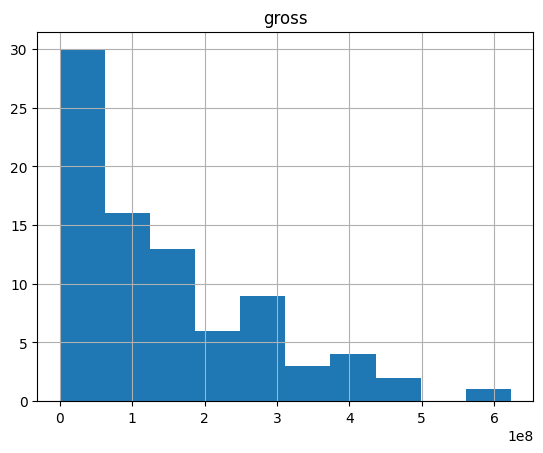

In [26]:
imdb2.hist("gross") # HISTOGRAMA DE LA VARIABLE GROSS

In [27]:
imdb2[imdb2["gross"].isnull()] # VEMOS LAS FILAS DE LA TABLA EN LAS QUE LA VARIABLE GROSS ES NULA

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
35,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
54,Sin Director,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
59,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
60,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
90,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,English,Kyrgyzstan,1400000.0,8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


In [28]:
imdb2[imdb2["gross"]>6e8] # VEMOS EL CASO EN QUE LA VARIABLE GROSS ES ANORMALMENTE GRANDE (OUTLIER)

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


Sustituimos los valores nulos por la media (suma de un conjunto de valores dividida entre el número total de sumandos) de los no nulos.

In [29]:
imdb2["gross"].fillna(imdb2["gross"].mean(),inplace=True)

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

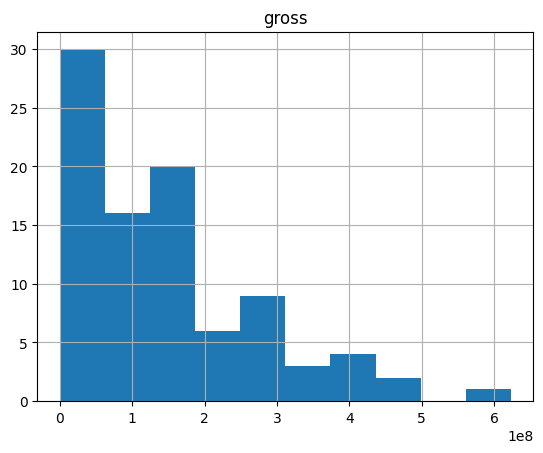

In [30]:
imdb2.hist("gross") # HISTOGRAMA DE LA VARIABLE GROSS

##### VARIABLE GÉNERO

In [31]:
imdb2["genres"].value_counts() # ANALIZAMOS QUE VALORES TOMA LA VARIABLE GENERO

genres
Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                

In [32]:
imdb2[imdb2["genres"].isnull()] # VEMOS LAS FILAS DE LA TABLA EN LAS QUE LA VARIABLE GENRE ES NULA

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
11,Christopher Spencer,170,59696176.0,NaN,Son of God,2014,English,USA,22000000.0,5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000


Sólo hay un caso en que la variable "genre" es nula -> VAMOS A ELIMINAR ESTA FILA

In [33]:
imdb2.dropna(subset=["genres"], inplace=True) # ELIMINAMOS LA FILA CON "GENRE" NULL

In [34]:
imdb2.head(15)

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,1.168667e+08,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,4.089923e+08,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,5.411619e+07,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,4.649500e+04,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,2.583554e+08,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,Sin Director,183,3.302491e+08,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Peter Jackson,-50,3.030012e+08,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
7,Edward Hall,180,1.477886e+08,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Joss Whedon,173,6.232795e+08,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
10,Tom Tykwer,172,2.709858e+07,Drama|Sci-Fi,Cloud Atlas,2012,English,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000


##### VARIABLE PRESUPUESTO

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

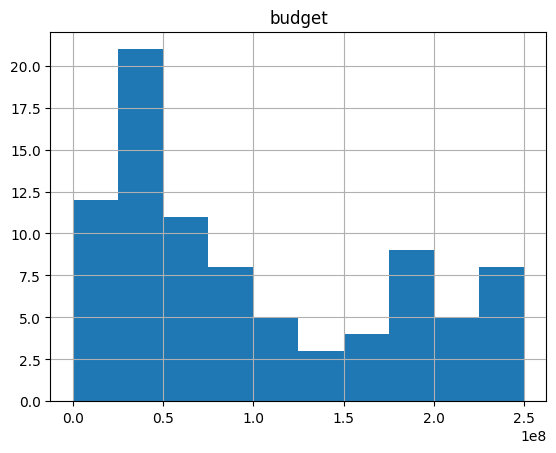

In [35]:
imdb2.hist("budget") # HISTOGRAMA DE LA VARIABLE BUDGET

In [36]:
imdb2[imdb2["budget"].isnull()] # VEMOS LOS CASOS EN QUE "BUDGET" ES NULA

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,1.477886e+08,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Gnana Rajasekaran,153,1.477886e+08,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
31,Mike Leigh,150,3.958500e+06,Biography|Drama|History,Mr. Turner,2014,English,UK,NaN,6.8,"Lesley Manville,Ruth Sheen,Karl Johnson",0
93,Richard J. Lewis,134,7.501404e+06,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0


Sustituimos los valores nulos por la mediana (valor de la variable de posición central en un conjunto de datos ordenados) de los no nulos.

In [37]:
imdb2["budget"].fillna(imdb2["budget"].median(),inplace=True)

### ANÁLISIS DE LAS VARIABLES NUMÉRICAS




In [38]:
imdb2.isnull().sum() # NOS ASEGURAMOS DE QUE NO QUEDEN VALORES NULOS

director_name           0
duration                0
gross                   0
genres                  0
movie_title             0
title_year              0
language                0
country                 0
budget                  0
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

Vemos el tamaño del nuevo dataframe. Hay 7 filas menos después de haber eliminado duplicados y la fila en la que el valor de "genre" era nulo. Hay una columna menos después de haber eliminado la variable "color".

In [39]:
imdb2.shape

(90, 12)

Ahora vamos a estudiar los outliers, que son observaciones que difieren notablemente del resto de los datos.

In [40]:
imdb2.describe() # DESCRIPCIÓN DE LAS VARIABLES NUMÉRICAS

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,90.000000,9.000000e+01,90.000000,9.000000e+01,90.000000,90.000000
mean,155.633333,1.487674e+08,1972.766667,1.022824e+08,6.865556,64483.611111
std,76.308871,1.295025e+08,268.226093,7.708074e+07,1.997536,58432.612069
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.000000,4.715570e+07,2012.000000,4.000000e+07,6.600000,24500.000000
50%,143.000000,1.224176e+08,2013.000000,7.250000e+07,7.200000,53500.000000
75%,153.000000,2.021590e+08,2014.000000,1.687500e+08,7.875000,83000.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


- La variable "duration" tiene valores negativos.

- La variable "imdb score" tiene valores negativos.

- La variable "title_year" tiene un valor mínimo anormalmente bajo.

#### ANALIZAMOS OUTLIERS Y DECIDIMOS QUÉ HACEMOS CON ELLOS

In [64]:
imdb3 = imdb2.copy() # CREAMOS UNA COPIA DEL DF

In [65]:
imdb3.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


##### VARIABLE DURACIÓN

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

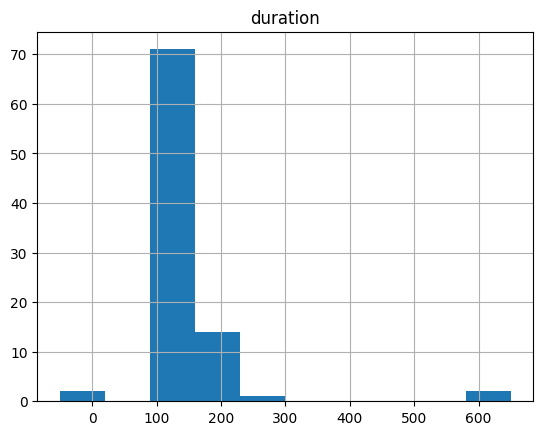

In [66]:
imdb3.hist("duration")

In [67]:
imdb3[imdb3["duration"]<50] # FILAS CON DURATION < 50

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
6,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
96,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [68]:
imdb3[imdb3["duration"]>300] # FILAS CON DURATION > 300

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
15,Quentin Tarantino,580,162804648.0,Drama|Western,Django Unchained,2012,English,USA,100000000.0,8.5,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
32,Gore Verbinski,650,89289910.0,Action|Adventure|Western,The Lone Ranger,2013,English,USA,215000000.0,6.5,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000


Vamos a sustituir el valor de "duration" en los casos en los que es menor de 50 o mayor de 300 por el promedio de la variable.

In [69]:
imdb3.loc[(imdb3["duration"]<50) |(imdb3["duration"]>300),'duration'] = imdb3["duration"].mean()

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

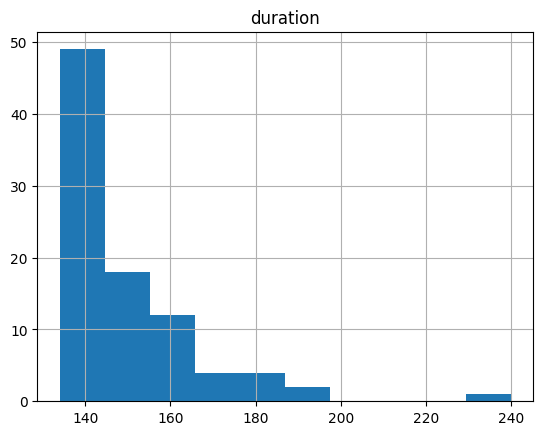

In [70]:
imdb3.hist("duration")

También podríamos usar la función "where" de la librería numpy.

In [71]:
imdb3 = imdb2.copy() # VOLVEMOS A COPIAR EL DATAFRAME DE JUSTO DESPUÉS DE ANALIZAR Y MODIFICAR NULOS

In [72]:
imdb3['duration']= np.where(imdb3['duration']<=50,imdb3["duration"].mean(),imdb3['duration']) # SUSTITUIMOS EL VALOR DE DURATION CUANDO <50 POR LA MEDIA

In [73]:
imdb3['duration']= np.where(imdb3['duration']>300,imdb3["duration"].mean(),imdb3['duration']) # SUSTITUIMOS EL VALOR DE DURATION CUANDO >300 POR LA MEDIA

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

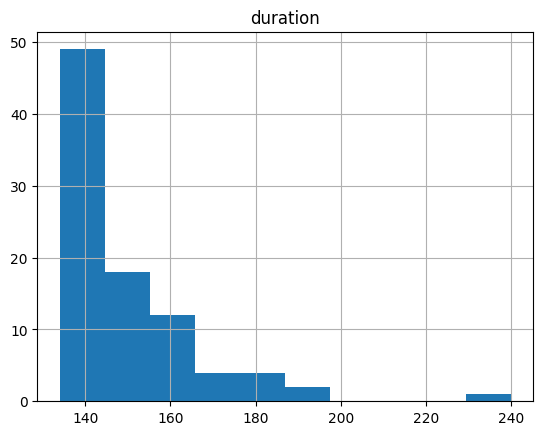

In [75]:
imdb3.hist("duration")

##### VARIABLE PUNTUACIÓN

array([[<Axes: title={'center': 'imdb_score'}>]], dtype=object)

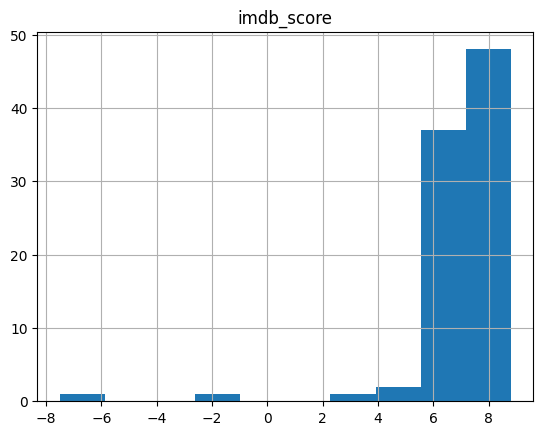

In [76]:
imdb3.hist("imdb_score")

In [77]:
imdb3[imdb3["imdb_score"]<0] # FILAS CON score < 0

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
10,Tom Tykwer,172.0,27098580.0,Drama|Sci-Fi,Cloud Atlas,2012,English,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000
83,Angelina Jolie Pitt,137.0,115603980.0,Biography|Drama|Sport|War,Unbroken,2014,English,USA,65000000.0,-1.2,"Finn Wittrock,Jack O'Connell,Alex Russell",35000


Vamos a eliminar las dos filas con score < 0 mediante el uso del "index" y el "drop".

In [78]:
imdb3[(imdb3["imdb_score"]<0)].index # EL INDEX DEVUELVE EL ÍNDICE DE LAS FILAS EN LAS QUE SE CUMPLE LA CONDICIÓN SCORE < 0

Index([10, 83], dtype='int64')

In [79]:
imdb3.drop(imdb3[(imdb3["imdb_score"]<0)].index, inplace=True) # EL DROP ELIMINA LAS FILAS EN LAS QUE SCORE < 0

array([[<Axes: title={'center': 'imdb_score'}>]], dtype=object)

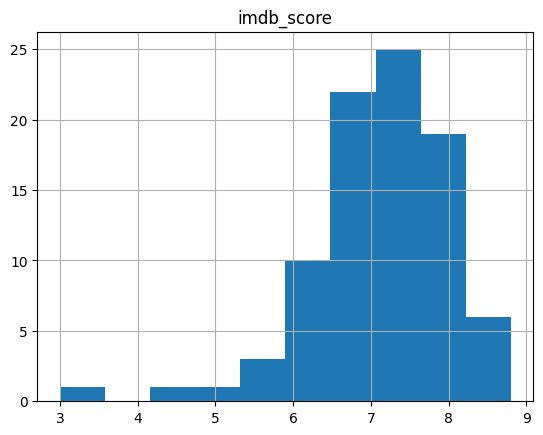

In [80]:
imdb3.hist("imdb_score")

##### VARIABLE AÑO DE LA PELÍCULA

array([[<Axes: title={'center': 'title_year'}>]], dtype=object)

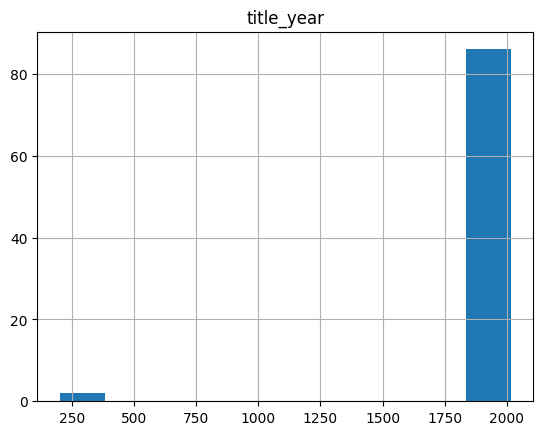

In [81]:
imdb3.hist("title_year")

Vamos a sustituir los valores de "año" en los casos en los que es menor de 1900 por la mediana de la variable.

In [82]:
int(imdb3["title_year"].median())

2013

In [83]:
imdb3.loc[(imdb3["title_year"]<1900),'title_year'] = imdb3["title_year"].median()

array([[<Axes: title={'center': 'title_year'}>]], dtype=object)

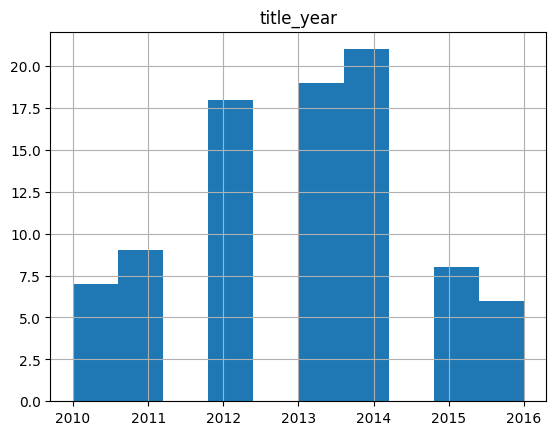

In [84]:
imdb3.hist("title_year")

### ANÁLISIS DE VARIABLES CATEGÓRICAS

##### VARIABLE GÉNERO



In [85]:
imdb3["genres"]

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
92                 Biography|Drama|History
93                            Comedy|Drama
94                Biography|Drama|Thriller
95                        Action|Drama|War
96           Biography|Drama|Music|Musical
Name: genres, Length: 88, dtype: object

In [86]:
imdb2["genres"].value_counts() # ANALIZAMOS QUE VALORES TOMA LA VARIABLE GENERO

genres
Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                

Nos interesa separar los distintos géneros de las películas en columnas diferentes. Para eso usaremos la función "str.split", que separa un string dado un separador o delimitador específico, que en nuestro caso será |.

Especificando "expand=True" dentro de "str.split", se expande la dimensionalidad de la columna y se divide la variable en distintas columnas.

Creamos una lista con los distintos gérenos de cada película por separado.

In [87]:
genero_list = imdb3["genres"].str.split("|",expand=True) # SEPARAMOS LOS GENEROS DE CADA PELICULA.
genero_list

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,None
1,Action,Adventure,Sci-Fi,None,None
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,None,None,None,None
4,Adventure,Fantasy,None,None,None
...,...,...,...,...,...
92,Biography,Drama,History,None,None
93,Comedy,Drama,None,None,None
94,Biography,Drama,Thriller,None,None
95,Action,Drama,War,None,None


Hemos separado los distintos géneros de cada película. Se dividen en 5 dimensiones puesto que el caso en el que más géneros había eran 5. En los casos en que hay menos de 5 géneros, los géneros sobrantes se quedan vacíos ("None").

Vamos a sustituir los géneros vacíos por "Sin Género".

In [88]:
genero_list.fillna('Sin Género', inplace=True)
genero_list

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,Sin Género
1,Action,Adventure,Sci-Fi,Sin Género,Sin Género
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,Sin Género,Sin Género,Sin Género,Sin Género
4,Adventure,Fantasy,Sin Género,Sin Género,Sin Género
...,...,...,...,...,...
92,Biography,Drama,History,Sin Género,Sin Género
93,Comedy,Drama,Sin Género,Sin Género,Sin Género
94,Biography,Drama,Thriller,Sin Género,Sin Género
95,Action,Drama,War,Sin Género,Sin Género


Ahora creamos nuevas columnas en el dataframe con los distintos géneros.

In [89]:
for i in genero_list: # LOOP EN LAS COLUMNAS DE LA TABLA genero_list
  imdb3["genre_"+str(i+1)] = genero_list[i] # CREAMOS COLUMNA EN imdb3 IGUAL A LA COLUMNA EN LA TABLA genero_list

In [90]:
imdb3.head(10)

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genre_1,genre_2,genre_3,genre_4,genre_5
0,Martin Scorsese,240.000000,1.168667e+08,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,Sin Género
1,Shane Black,195.000000,4.089923e+08,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
2,Quentin Tarantino,187.000000,5.411619e+07,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Kenneth Lonergan,186.000000,4.649500e+04,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,Sin Género,Sin Género,Sin Género,Sin Género
4,Peter Jackson,186.000000,2.583554e+08,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género
5,Sin Director,183.000000,3.302491e+08,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,2013,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
6,Peter Jackson,155.633333,3.030012e+08,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género
7,Edward Hall,180.000000,1.477886e+08,Drama|Romance,Restless,2012,English,UK,72500000.0,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434,Drama,Romance,Sin Género,Sin Género,Sin Género
8,Joss Whedon,173.000000,6.232795e+08,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
12,Christopher Nolan,169.000000,1.879914e+08,Adventure|Drama|Sci-Fi,Interstellar,2014,English,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000,Adventure,Drama,Sci-Fi,Sin Género,Sin Género


Como ya tenemos los géneros por separado, podemos eliminar la columna "genres".

In [91]:
del(imdb3["genres"])

In [92]:
imdb3.head(10)

,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genre_1,genre_2,genre_3,genre_4,genre_5
0,Martin Scorsese,240.000000,1.168667e+08,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,Sin Género
1,Shane Black,195.000000,4.089923e+08,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
2,Quentin Tarantino,187.000000,5.411619e+07,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Kenneth Lonergan,186.000000,4.649500e+04,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,Sin Género,Sin Género,Sin Género,Sin Género
4,Peter Jackson,186.000000,2.583554e+08,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género
5,Sin Director,183.000000,3.302491e+08,Batman v Superman: Dawn of Justice,2013,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
6,Peter Jackson,155.633333,3.030012e+08,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género
7,Edward Hall,180.000000,1.477886e+08,Restless,2012,English,UK,72500000.0,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434,Drama,Romance,Sin Género,Sin Género,Sin Género
8,Joss Whedon,173.000000,6.232795e+08,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,Action,Adventure,Sci-Fi,Sin Género,Sin Género
12,Christopher Nolan,169.000000,1.879914e+08,Interstellar,2014,English,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000,Adventure,Drama,Sci-Fi,Sin Género,Sin Género


##### VARIABLE ACTORES

Vamos a proceder de la misma manera que con los géneros.

In [93]:
imdb3["actors"]

0     Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1             Robert Downey Jr.,Jon Favreau,Don Cheadle
2             Craig Stark,Jennifer Jason Leigh,Zoë Bell
3           Matt Damon,Kieran Culkin,John Gallagher Jr.
4                 Aidan Turner,Adam Brown,James Nesbitt
                            ...                        
92         Quvenzhané Wallis,Scoot McNairy,Taran Killam
93                     Mark Addy,Atom Egoyan,Paul Gross
94               Tom Hanks,Chris Mulkey,Michael Chernus
95                   Brad Pitt,Logan Lerman,Jim Parrack
96        Johnny Cannizzaro,Steve Schirripa,Scott Vance
Name: actors, Length: 88, dtype: object

In [94]:
imdb2["actors"].value_counts()

actors
Aidan Turner,Adam Brown,James Nesbitt                   3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    2
Morgan Freeman,Ayelet Zurer,Moises Arias                2
Finn Wittrock,Jack O'Connell,Alex Russell               2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau       1
                                                       ..
Jennifer Lawrence,Peter Dinklage,Hugh Jackman           1
Patrick Fugit,Sela Ward,Emily Ratajkowski               1
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Lesley Manville,Ruth Sheen,Karl Johnson                 1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: count, Length: 85, dtype: int64

In [95]:
actors_list = imdb3["actors"].str.split(",",expand=True) # SEPARAMOS LOS ACTORES DE CADA PELICULA, ESTA VEZ POR ",".
actors_list

,0,1,2
0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...
92,Quvenzhané Wallis,Scoot McNairy,Taran Killam
93,Mark Addy,Atom Egoyan,Paul Gross
94,Tom Hanks,Chris Mulkey,Michael Chernus
95,Brad Pitt,Logan Lerman,Jim Parrack


In [96]:
actors_list.fillna('Sin Actor', inplace=True)
actors_list

,0,1,2
0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...
92,Quvenzhané Wallis,Scoot McNairy,Taran Killam
93,Mark Addy,Atom Egoyan,Paul Gross
94,Tom Hanks,Chris Mulkey,Michael Chernus
95,Brad Pitt,Logan Lerman,Jim Parrack


In [97]:
for i in actors_list:
  imdb3["actor_"+str(i+1)] = actors_list[i]

In [98]:
del(imdb3["actors"])

In [99]:
imdb3.head(20)

,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,movie_facebook_likes,genre_1,genre_2,genre_3,genre_4,genre_5,actor_1,actor_2,actor_3
0,Martin Scorsese,240.000000,1.168667e+08,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,138000,Biography,Comedy,Crime,Drama,Sin Género,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Shane Black,195.000000,4.089923e+08,Iron Man 3,2013,English,USA,200000000.0,7.2,95000,Action,Adventure,Sci-Fi,Sin Género,Sin Género,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Quentin Tarantino,187.000000,5.411619e+07,The Hateful Eight,2015,English,USA,44000000.0,7.9,114000,Crime,Drama,Mystery,Thriller,Western,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Kenneth Lonergan,186.000000,4.649500e+04,Margaret,2011,English,usa,14000000.0,6.5,0,Drama,Sin Género,Sin Género,Sin Género,Sin Género,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Peter Jackson,186.000000,2.583554e+08,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,83000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género,Aidan Turner,Adam Brown,James Nesbitt
5,Sin Director,183.000000,3.302491e+08,Batman v Superman: Dawn of Justice,2013,English,USA,250000000.0,6.9,197000,Action,Adventure,Sci-Fi,Sin Género,Sin Género,Henry Cavill,Lauren Cohan,Alan D. Purwin
6,Peter Jackson,155.633333,3.030012e+08,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,166000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género,Aidan Turner,Adam Brown,James Nesbitt
7,Edward Hall,180.000000,1.477886e+08,Restless,2012,English,UK,72500000.0,7.2,434,Drama,Romance,Sin Género,Sin Género,Sin Género,Rufus Sewell,Hayley Atwell,Charlotte Rampling
8,Joss Whedon,173.000000,6.232795e+08,The Avengers,2012,English,USA,220000000.0,8.1,123000,Action,Adventure,Sci-Fi,Sin Género,Sin Género,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
12,Christopher Nolan,169.000000,1.879914e+08,Interstellar,2014,English,USA,165000000.0,8.6,349000,Adventure,Drama,Sci-Fi,Sin Género,Sin Género,Matthew McConaughey,Anne Hathaway,Mackenzie Foy


##### VARIABLE LANGUAGE

In [100]:
imdb3["language"]

0     English
1     English
2     English
3     English
4     English
       ...   
92    English
93    English
94    English
95    English
96    English
Name: language, Length: 88, dtype: object

In [101]:
imdb2["language"].value_counts()

language
English    90
Name: count, dtype: int64

El único idioma de las películas de nuestro dataframe es el inglés. Podríamos eliminar la variable al no ser informativa, pero también podemos dejarla al no tener nulos ni nada que pueda sesgar los datos.

##### VARIABLE COUNTRY

In [102]:
imdb3["country"]

0        USA
1        USA
2        USA
3        usa
4        USA
       ...  
92       USA
93    Canada
94       USA
95       USA
96       USA
Name: country, Length: 88, dtype: object

In [103]:
imdb3["country"].value_counts()

country
USA               70
UK                 6
usa                3
France             2
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: count, dtype: int64

Hay tres valores distintos ("USA", "usa" y "United States") que realmente son lo mismo. Vamos a sustituir "usa" y "United States" por "USA".

In [104]:
imdb3['country']= np.where(imdb3['country']=="usa","USA",imdb3['country'])
imdb3['country']= np.where(imdb3['country']=="United States","USA",imdb3['country'])

In [105]:
imdb3["country"].value_counts()

country
USA               74
UK                 6
France             2
New Zealand        1
India              1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: count, dtype: int64

In [106]:
imdb3

,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,movie_facebook_likes,genre_1,genre_2,genre_3,genre_4,genre_5,actor_1,actor_2,actor_3
0,Martin Scorsese,240.000000,116866727.0,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,138000,Biography,Comedy,Crime,Drama,Sin Género,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Shane Black,195.000000,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,95000,Action,Adventure,Sci-Fi,Sin Género,Sin Género,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Quentin Tarantino,187.000000,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,114000,Crime,Drama,Mystery,Thriller,Western,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Kenneth Lonergan,186.000000,46495.0,Margaret,2011,English,USA,14000000.0,6.5,0,Drama,Sin Género,Sin Género,Sin Género,Sin Género,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Peter Jackson,186.000000,258355354.0,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,83000,Adventure,Fantasy,Sin Género,Sin Género,Sin Género,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Steve McQueen,134.000000,56667870.0,12 Years a Slave,2013,English,USA,20000000.0,8.1,83000,Biography,Drama,History,Sin Género,Sin Género,Quvenzhané Wallis,Scoot McNairy,Taran Killam
93,Richard J. Lewis,134.000000,7501404.0,Barney's Version,2010,English,Canada,72500000.0,7.3,0,Comedy,Drama,Sin Género,Sin Género,Sin Género,Mark Addy,Atom Egoyan,Paul Gross
94,Paul Greengrass,134.000000,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,65000,Biography,Drama,Thriller,Sin Género,Sin Género,Tom Hanks,Chris Mulkey,Michael Chernus
95,David Ayer,134.000000,85707116.0,Fury,2014,English,USA,68000000.0,7.6,82000,Action,Drama,War,Sin Género,Sin Género,Brad Pitt,Logan Lerman,Jim Parrack
